The examples that follow are contained in, or inspired by, the article *Python: Make Your Own Julia Fractals* by Tariq Rashid. The article appeared in Linuxvoice on pages 98-101. The article can be found here:
https://www.linuxvoice.com/issues/010/julia.pdf

This article is a continuation of *Python: Make Your Own Fractals* by the same author.

# Plotting Julia Sets

Julia sets are another fractal type object. They have an intimate connection to the Mandlebrodt set that we will discuss later. The idea behind the computation is the same. To use \\(z^2+c\\), in an iterative manner, and decide how big the modulus becomes. When we plotted the Mandelbrodt set, we set \\(c = 0\\). For the Julia set, we begin with a nonzero \\(c\\).

In [90]:
import matplotlib.pyplot as pyplot   # import pyplot for graphing
from matplotlib import colors
import math
import cmath                          # import math functions w/ complex numbers
import numpy as np                   # import numpy for arrays
%matplotlib inline

Here we have defined the Julia set version of the iteration. In the Mandlebrot version, this was the function ```mandel```. The functionality is virtually the same. The function keeps applying \\(z^2+c\\), to determine if the modulus, of the complex number, ever becomes larger than 4. If it does, the number of iterations is returned. Otherwise, the maximum number of iterations is returned.

In [3]:
def julia(z, c, maxiter):
    for iter in range(maxiter):
        z = z*z+c
        if abs(z) > 4:
            break
    return iter

In the following two cells, we have the code to produce the Julia set. You will see many similarities between this code and the code in the Mandelbrodt demonstration.

In [15]:
xvalues = np.linspace(-2, 2, 1000)
yvalues = np.linspace(-2, 2, 1000)

xlen = len(xvalues)
ylen = len(yvalues)

c = complex(-0.35, -1.05)

atlas = np.empty([xlen, ylen])

for ix in range(xlen):
    for iy in range(ylen):
        zx = xvalues[ix]
        zy = yvalues[iy]
        z = complex(zx, zy)
        
        atlas[ix,iy] = julia(z, c, 100)

We're using the same parameters, to plot the Julia set, that we've used previously. Some Julia sets are what topologists refer to as connected. That is they come in one piece. Other Julia sets are *disconnected* (come in many pieces), while others appear to be "dust" like. The connectednes of a Julia set is related to the number \\(c\\). If the number \\(c\\) belongs to the Mandelbrodt set, then the Julia Set is connected; otherwise it is disconnected.

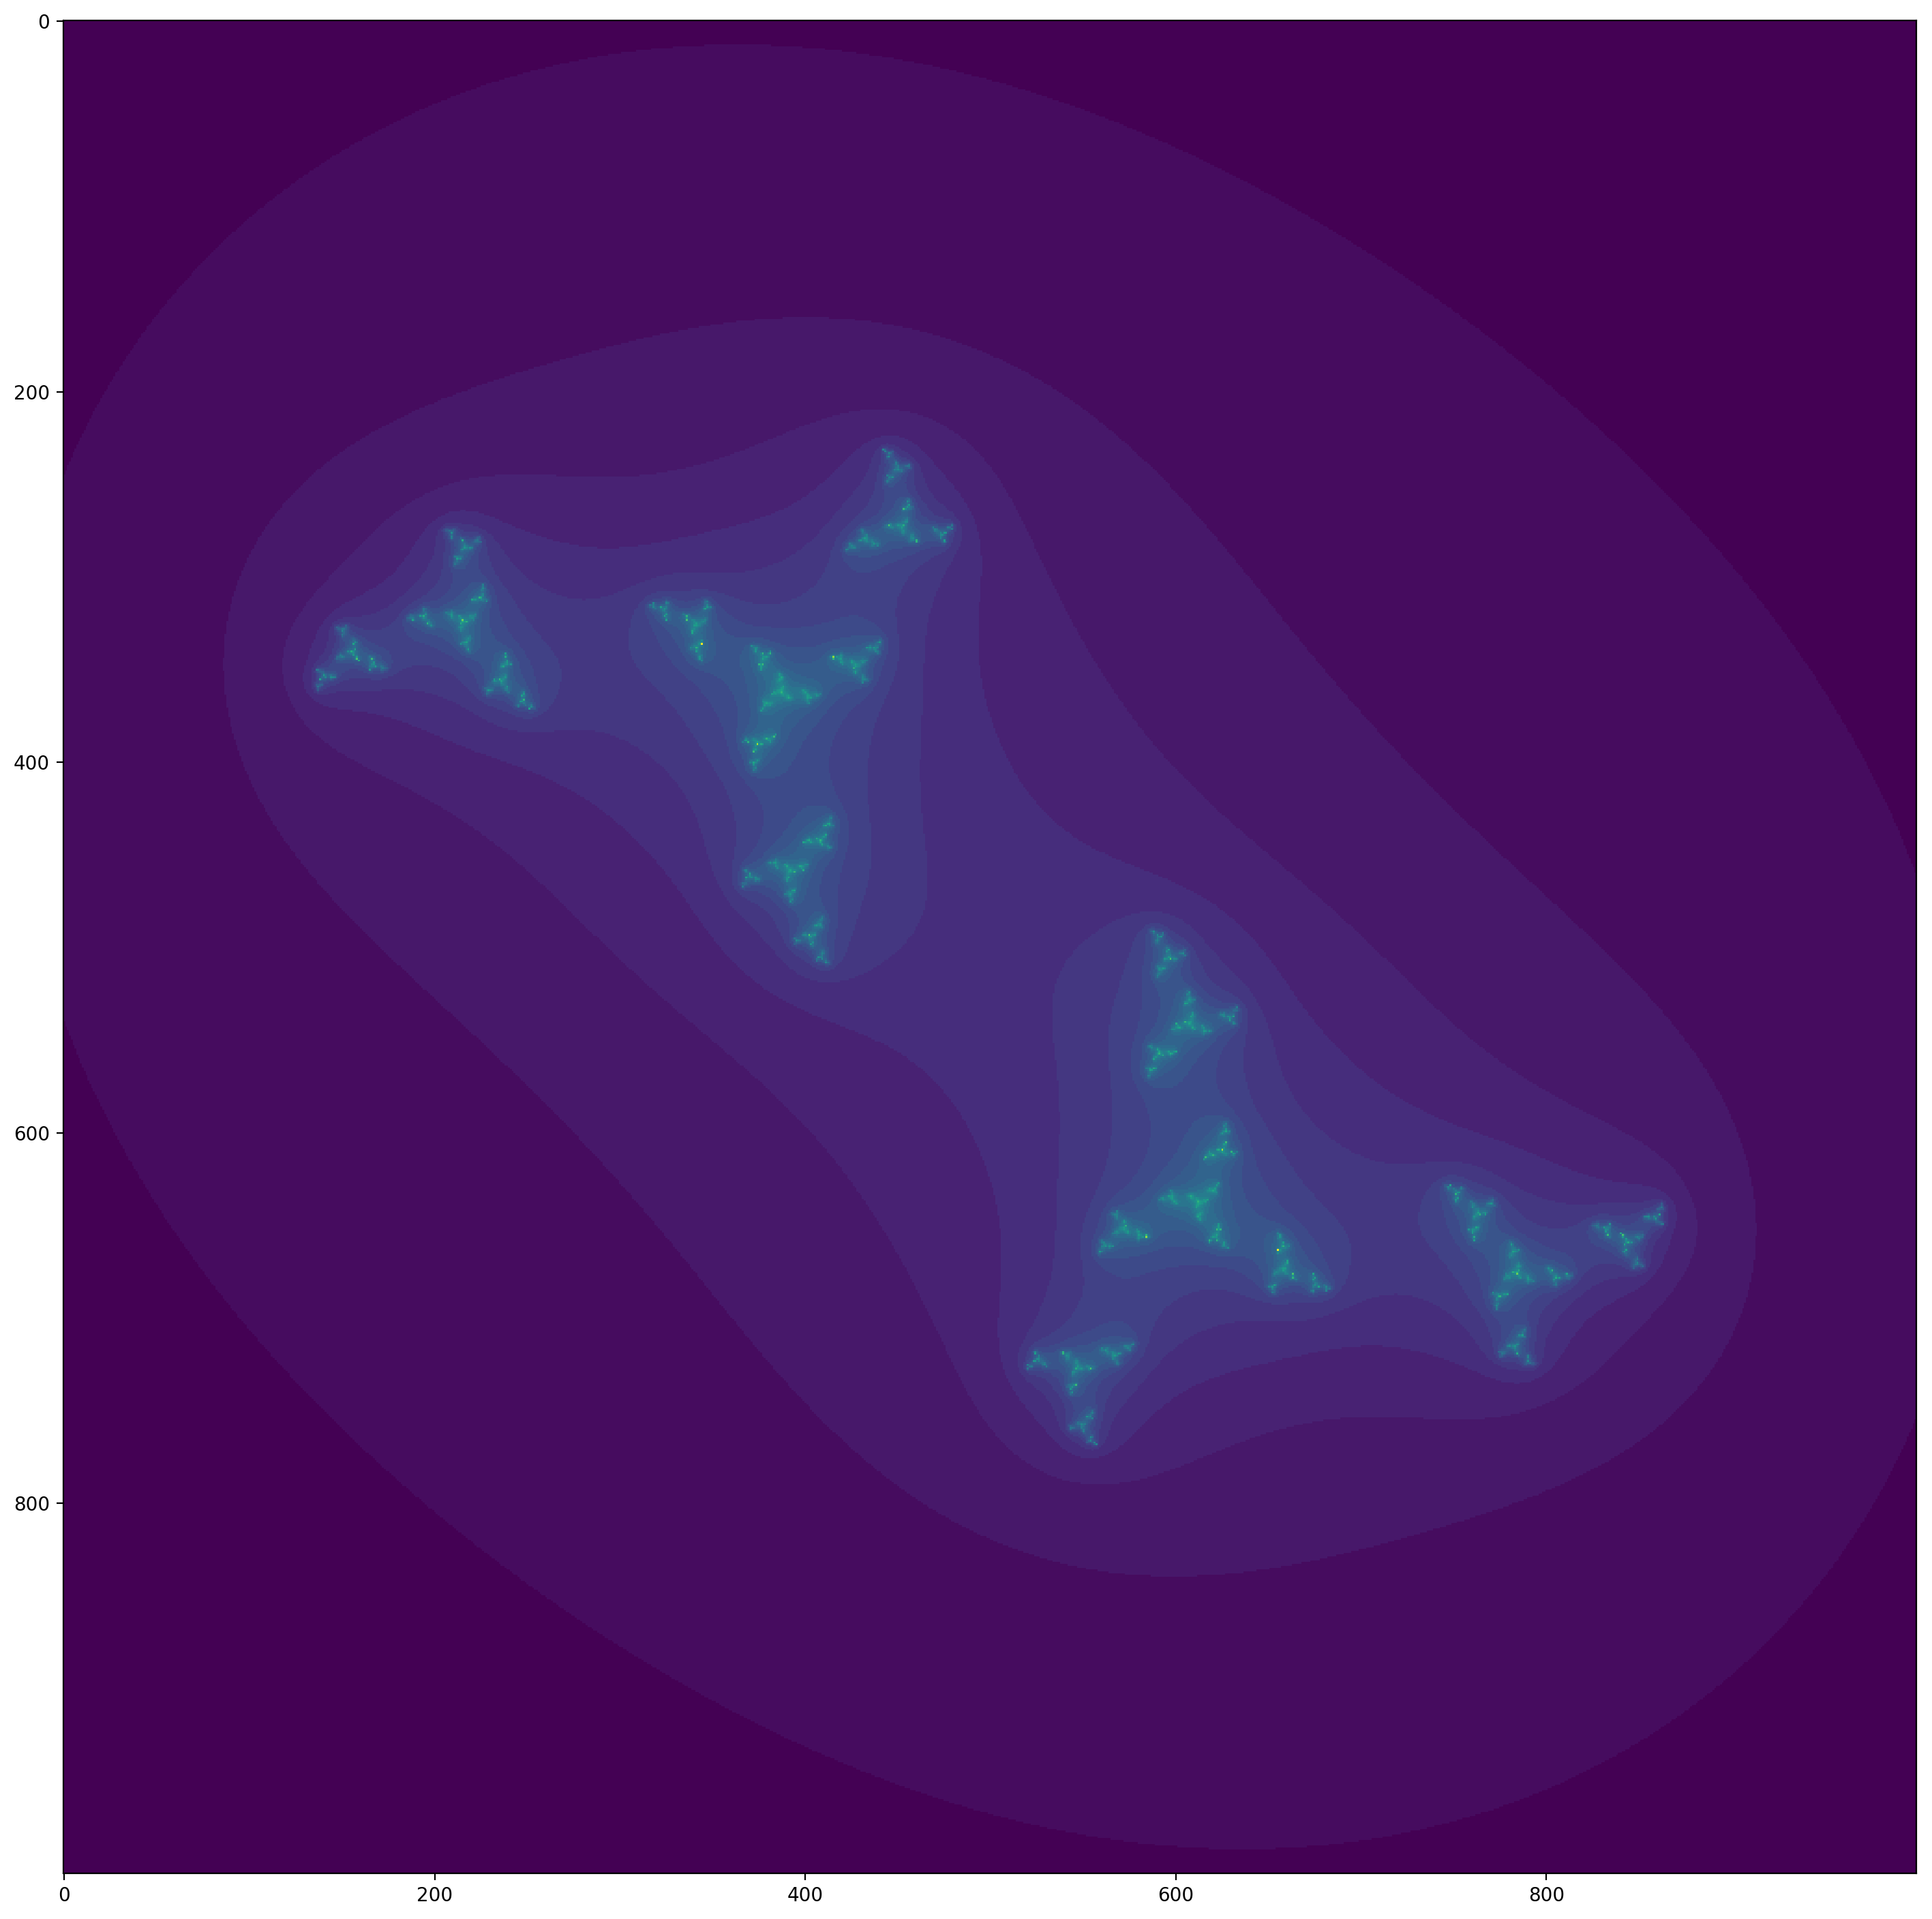

In [16]:
fig = pyplot.figure(figsize=(18,18), dpi = 200)
pyplot.imshow(atlas.T, interpolation = "nearest")
pyplot.show()

### A Couple of Notes:

The generation of this Julia set is exactly the same as the other, as far as the computation goes. Some things to note:

1. The complex number \\(c\\) is defined using the complex exponential, from the cmath module.
2. The constant pi is also used from the cmath module.

In [73]:
xvalues = np.linspace(-2, 2, 1000)
yvalues = np.linspace(-2, 2, 1000)

xlen = len(xvalues)
ylen = len(yvalues)

c = 0.7885*cmath.exp(1j*cmath.pi/2)

atlas = np.empty([xlen, ylen])

for ix in range(xlen):
    for iy in range(ylen):
        zx = xvalues[ix]
        zy = yvalues[iy]
        z = complex(zx, zy)
        
        atlas[ix,iy] = julia(z, c, 100)

We've made some enhancements to the way the Julia set is presented. Sometimes it is difficult to distinguish the set, especially if it is one of the "dust" like sets. Using a lightsource, from matplotlib colors, and the shading, we get a more pronounced display, of the Julia set.

A reference to these techniques can be found in the matplotlib documentation here:
https://matplotlib.org/examples/specialty_plots/topographic_hillshading.html

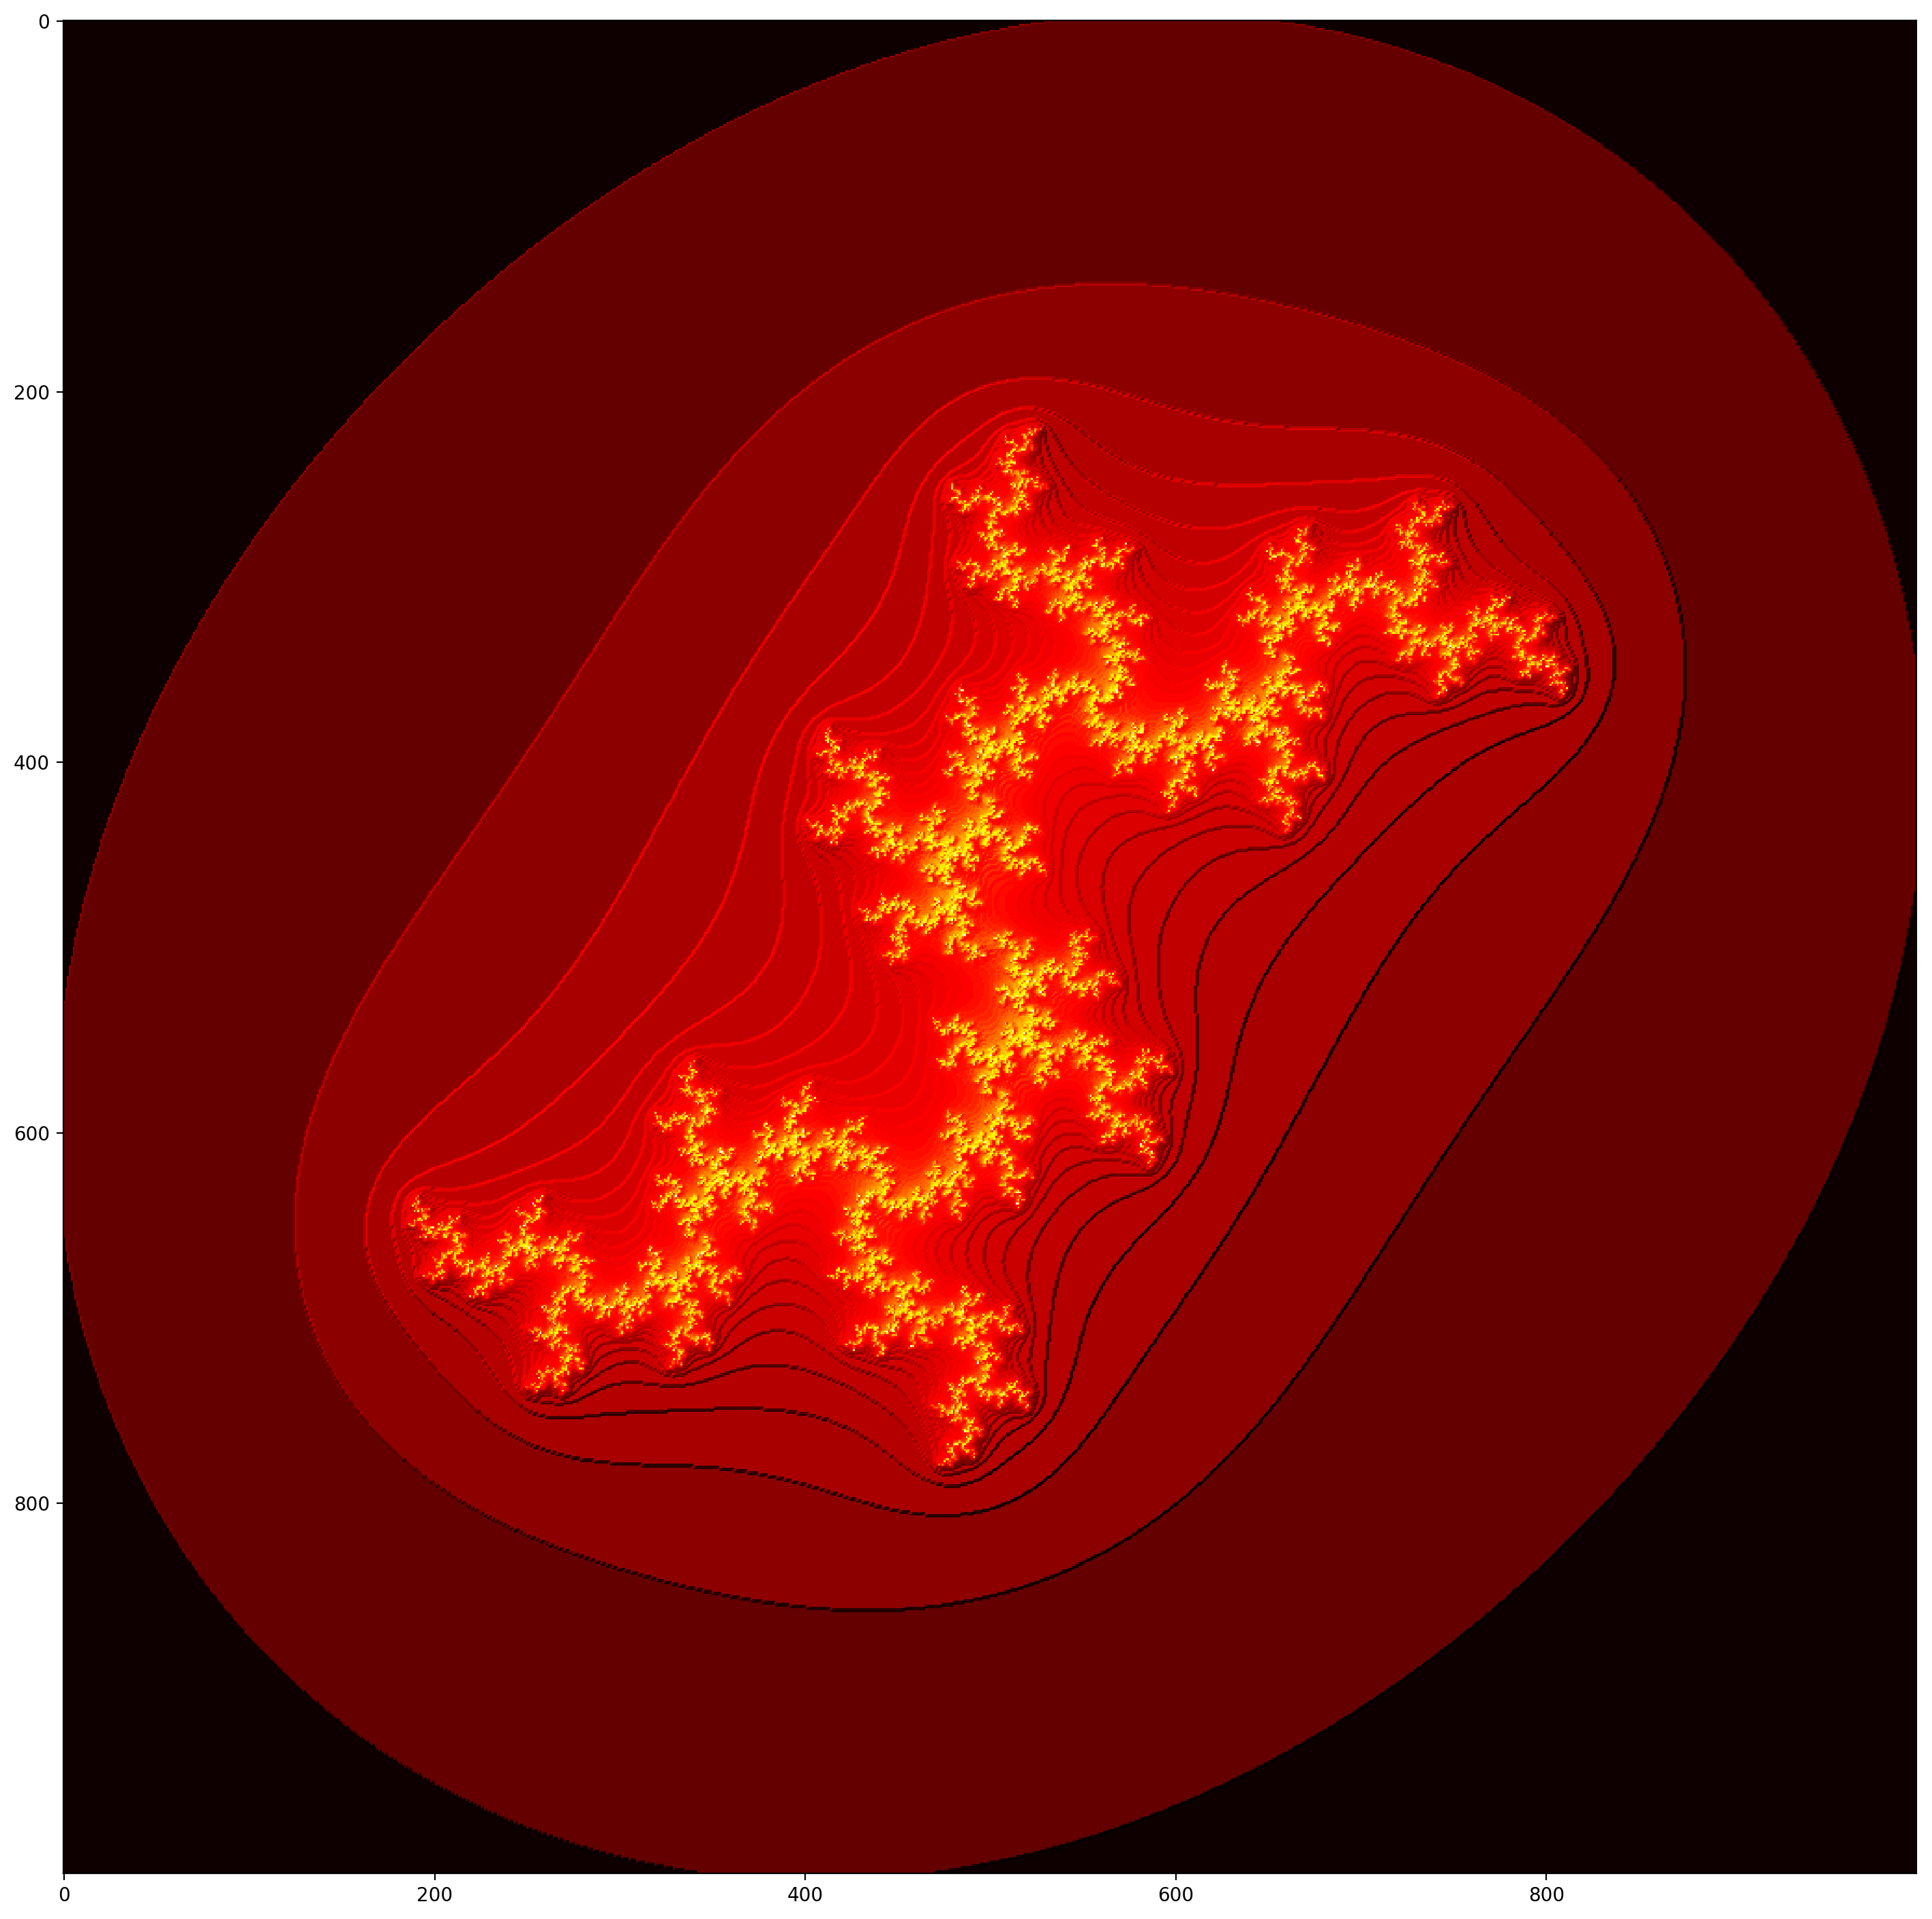

In [74]:
fig = pyplot.figure(figsize=(18,18), dpi = 200)
light = colors.LightSource(azdeg=315, altdeg=20)
atlas = light.shade(atlas.T, cmap=pyplot.cm.hot, vert_exag=10, norm=colors.PowerNorm(0.5), blend_mode = 'overlay')
pyplot.imshow(atlas, interpolation = "nearest")
pyplot.show()

# Enter the Realm of 3d?

In [159]:
dataX = np.arange(0,2,1)
dataY = np.arange(0,3,1)
dataY, dataX = np.meshgrid(dataX, dataY)

print(dataX)
print(dataY)

dataArray = np.zeros([3,2])
dataArray[0,0] = 1
dataArray[0,1] = 2
dataArray[1,0] = 9
dataArray[2,1] = 12
print(dataArray)

[[0 0]
 [1 1]
 [2 2]]
[[0 1]
 [0 1]
 [0 1]]
[[  1.   2.]
 [  9.   0.]
 [  0.  12.]]


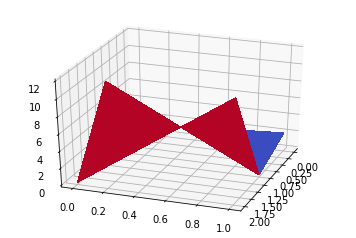

In [170]:
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = fig.gca(projection = "3d")
ax.view_init(30, 20)
surf = ax.plot_surface(dataX, dataY, dataArray, cmap=pyplot.cm.coolwarm, linewidth=0, antialiased=False)
pyplot.show()

In [203]:
import scipy.ndimage

dataX = np.arange(-2,2,0.001)
dataY = np.arange(-2,2,0.001)

graphX, graphY = np.meshgrid(dataX, dataY)

xlen = len(dataX)
ylen = len(dataY)

c = complex(-0.78662,0.130477)

atlas = np.empty([xlen, ylen])

for ix in range(xlen):
    for iy in range(ylen):
        zx = dataX[ix]
        zy = dataY[iy]
        z = complex(zx, zy)
        
        atlas[ix,iy] = julia(z, c, 100)

print(np.shape(graphX))
print(np.shape(graphY))
print(np.shape(atlas))

(4000, 4000)
(4000, 4000)
(4000, 4000)


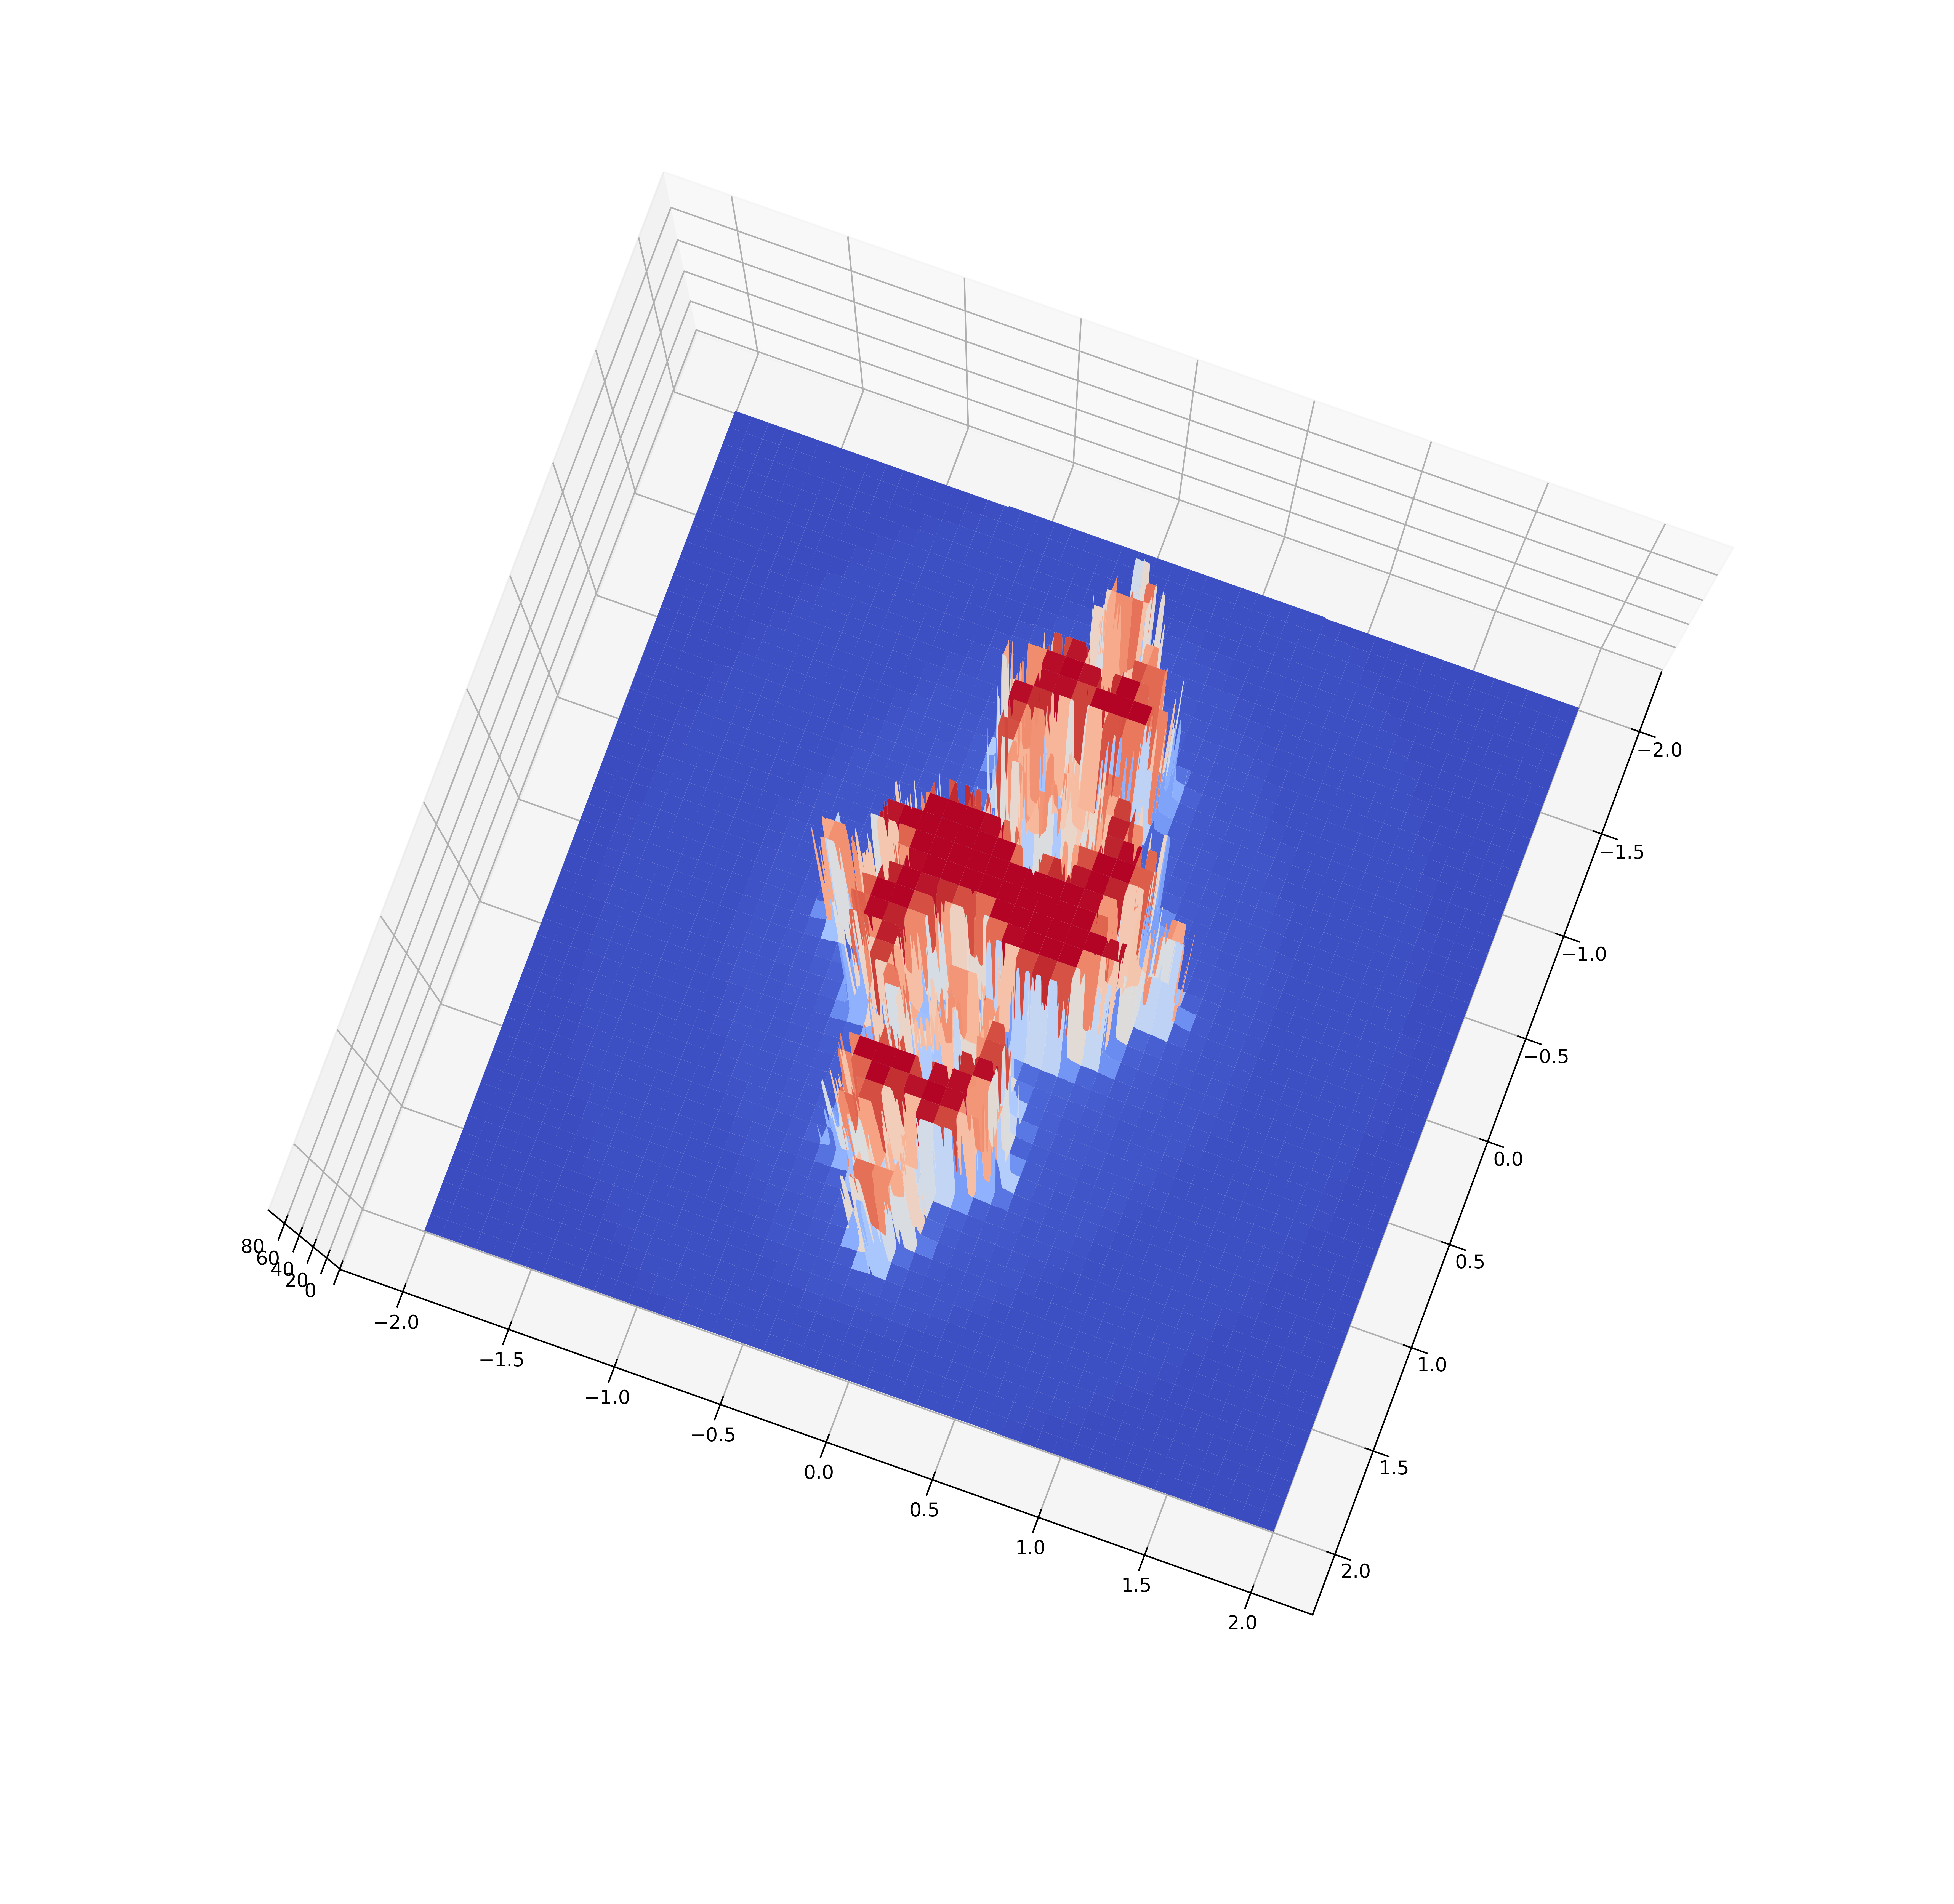

In [208]:
fig = pyplot.figure()
fig = pyplot.figure(figsize=(18,18), dpi = 500)
ax = fig.gca(projection = "3d")
ax.view_init(85, 20)
smoothed_atlas = scipy.ndimage.gaussian_filter(atlas.T,2)
surf = ax.plot_surface(graphX, graphY, smoothed_atlas, cmap=pyplot.cm.coolwarm, linewidth=0.1, antialiased=True)
pyplot.show()

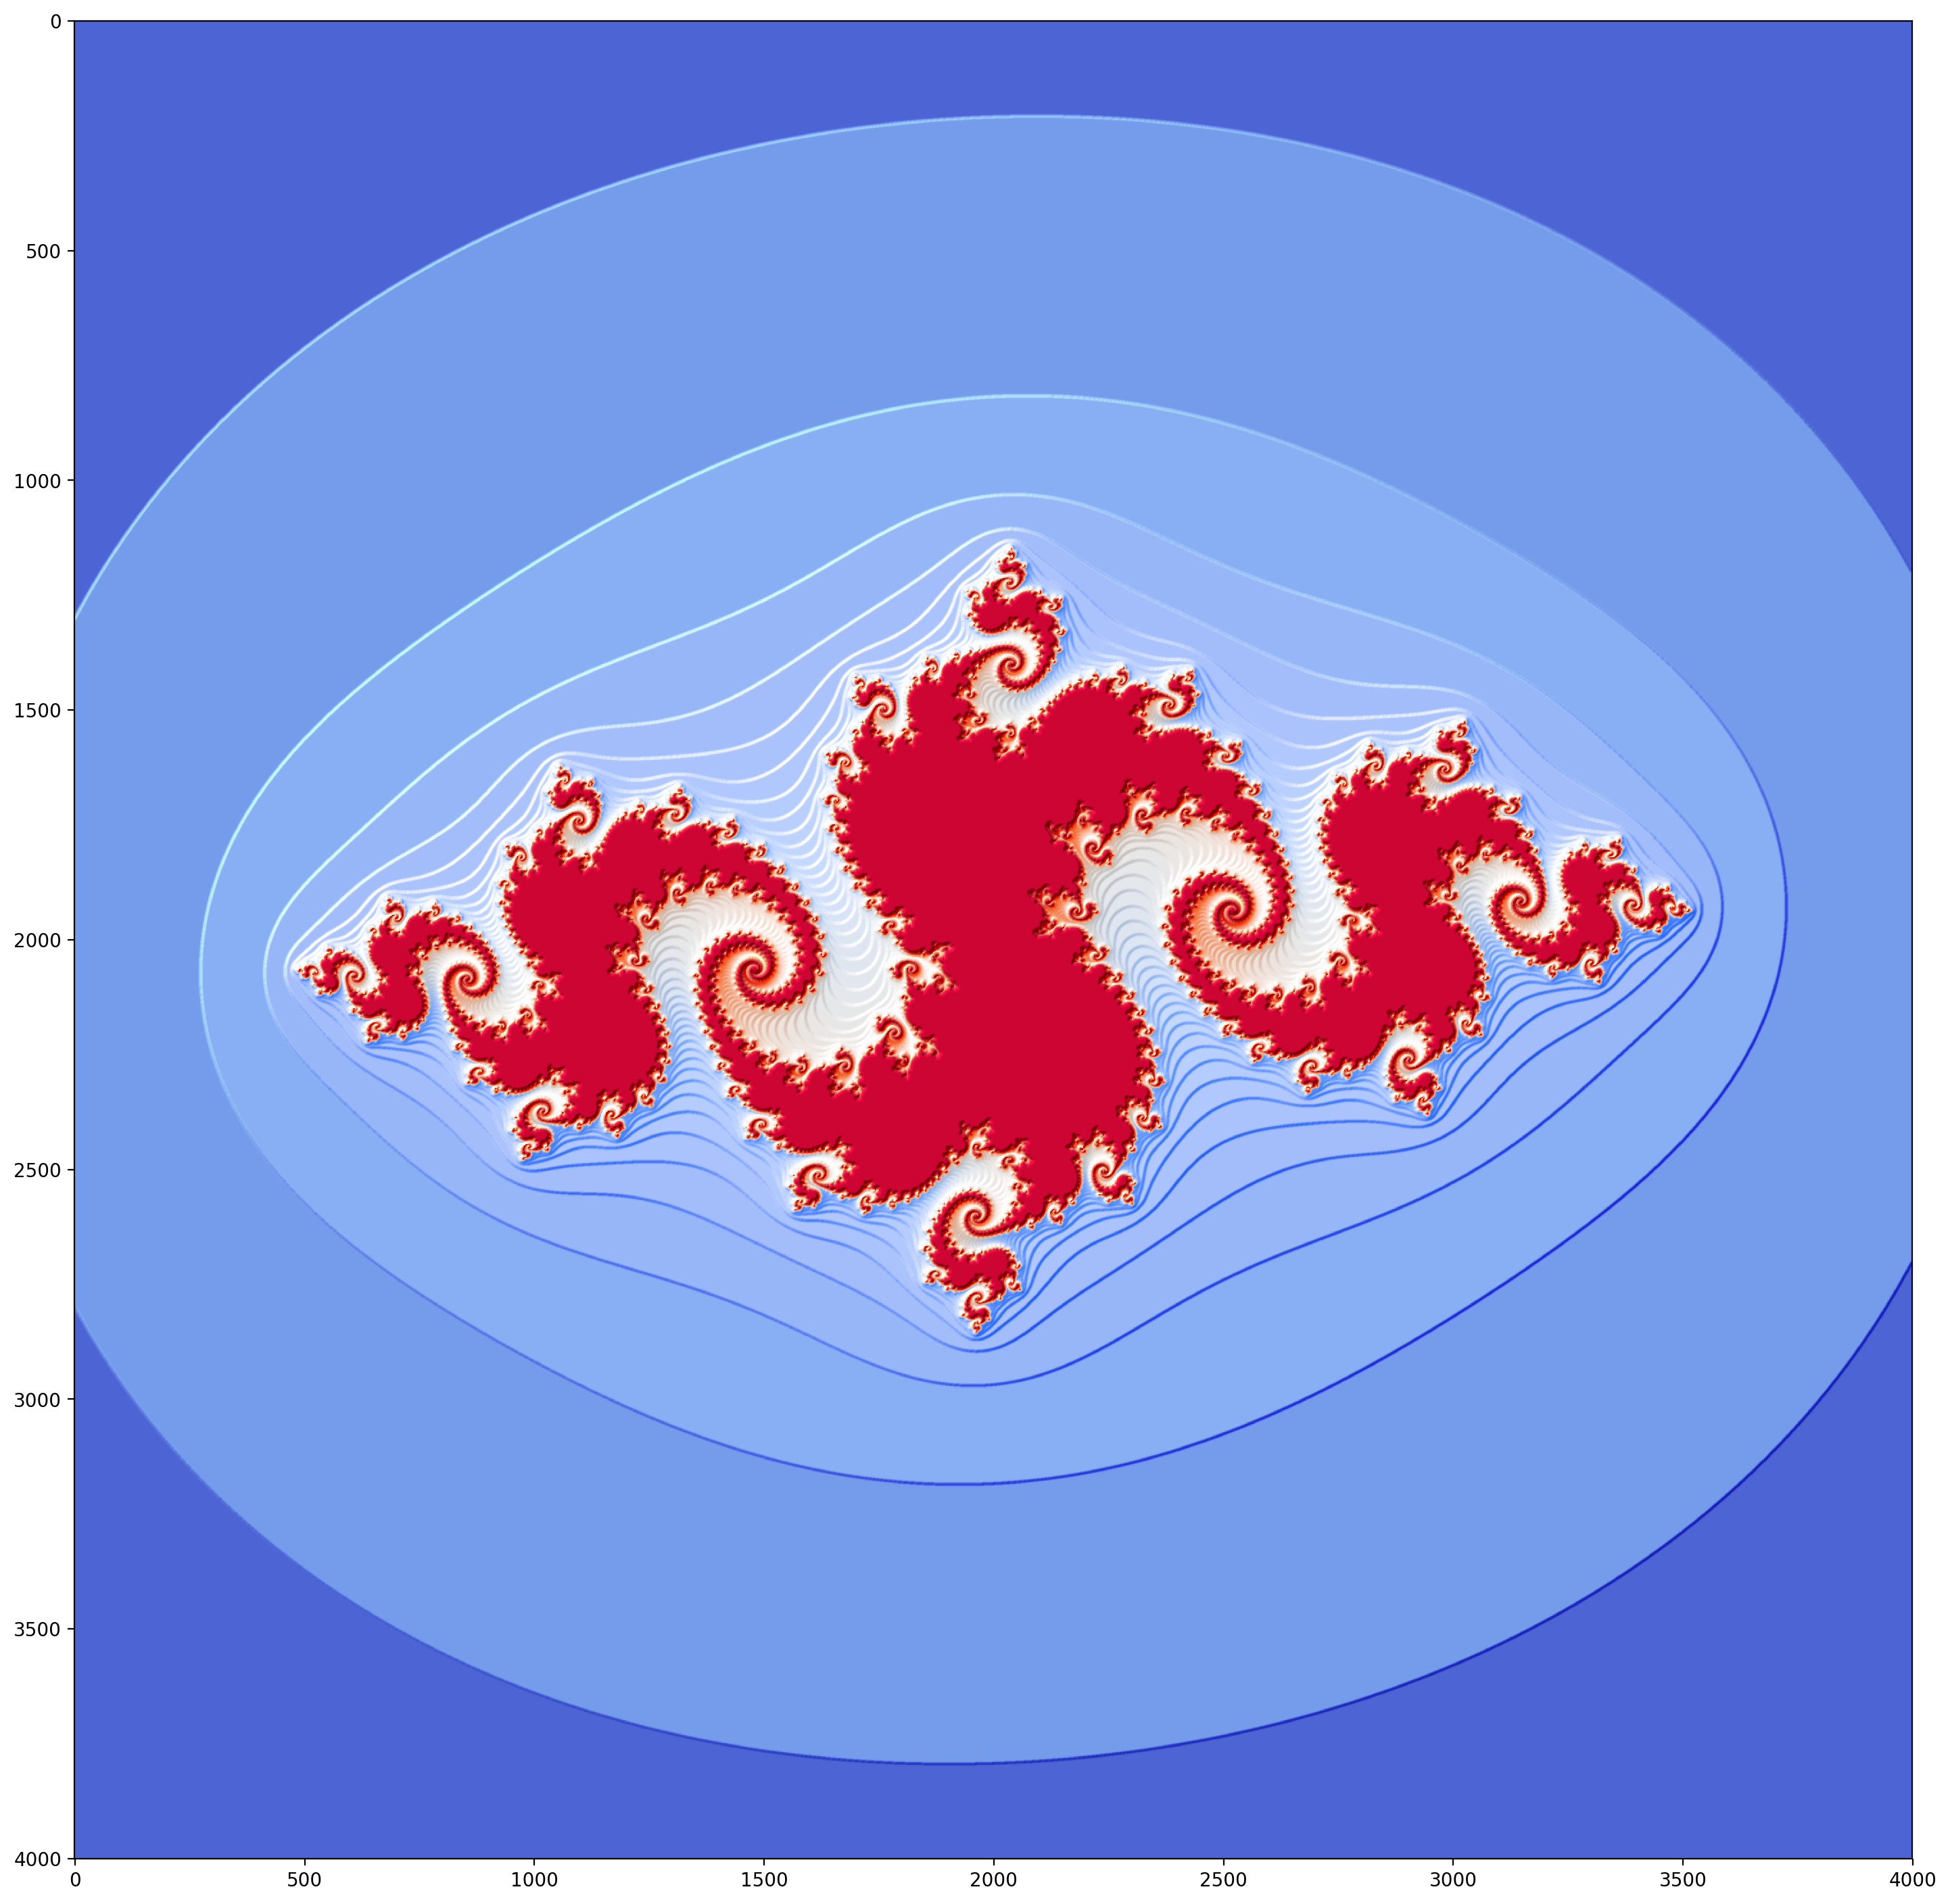

In [200]:
fig = pyplot.figure(figsize=(18,18), dpi = 200)
light = colors.LightSource(azdeg=315, altdeg=20)
atlas = light.shade(smoothed_atlas, cmap=pyplot.cm.coolwarm, vert_exag=10, norm=colors.PowerNorm(0.5), blend_mode = 'overlay')
pyplot.imshow(atlas, interpolation = "nearest")
pyplot.show()